Loss: 1.0428, lr: 0.000010
Loss: 1.0401, lr: 0.000010
Loss: 1.0408, lr: 0.000010
Loss: 1.0415, lr: 0.000010
Loss: 1.0396, lr: 0.000010
Loss: 1.0425, lr: 0.000010
Loss: 1.0377, lr: 0.000010
Loss: 1.0370, lr: 0.000010
Loss: 1.0396, lr: 0.000010
Loss: 1.0385, lr: 0.000010
Loss: 1.0362, lr: 0.000010
Loss: 1.0330, lr: 0.000010
Loss: 1.0339, lr: 0.000010
Loss: 1.0383, lr: 0.000010
Loss: 1.0321, lr: 0.000011
Loss: 1.0365, lr: 0.000011
Loss: 1.0337, lr: 0.000011
Loss: 1.0322, lr: 0.000011
Loss: 1.0339, lr: 0.000011
Loss: 1.0329, lr: 0.000011
Loss: 1.0323, lr: 0.000011
Loss: 1.0340, lr: 0.000011
Loss: 1.0288, lr: 0.000011
Loss: 1.0302, lr: 0.000011
Loss: 1.0308, lr: 0.000011
Loss: 1.0271, lr: 0.000011
Loss: 1.0314, lr: 0.000011
Loss: 1.0325, lr: 0.000011
Loss: 1.0270, lr: 0.000011
Loss: 1.0237, lr: 0.000011
Loss: 1.0262, lr: 0.000011
Loss: 1.0290, lr: 0.000011
Loss: 1.0244, lr: 0.000011
Loss: 1.0228, lr: 0.000011
Loss: 1.0236, lr: 0.000011
Loss: 1.0294, lr: 0.000011
Loss: 1.0255, lr: 0.000011
L

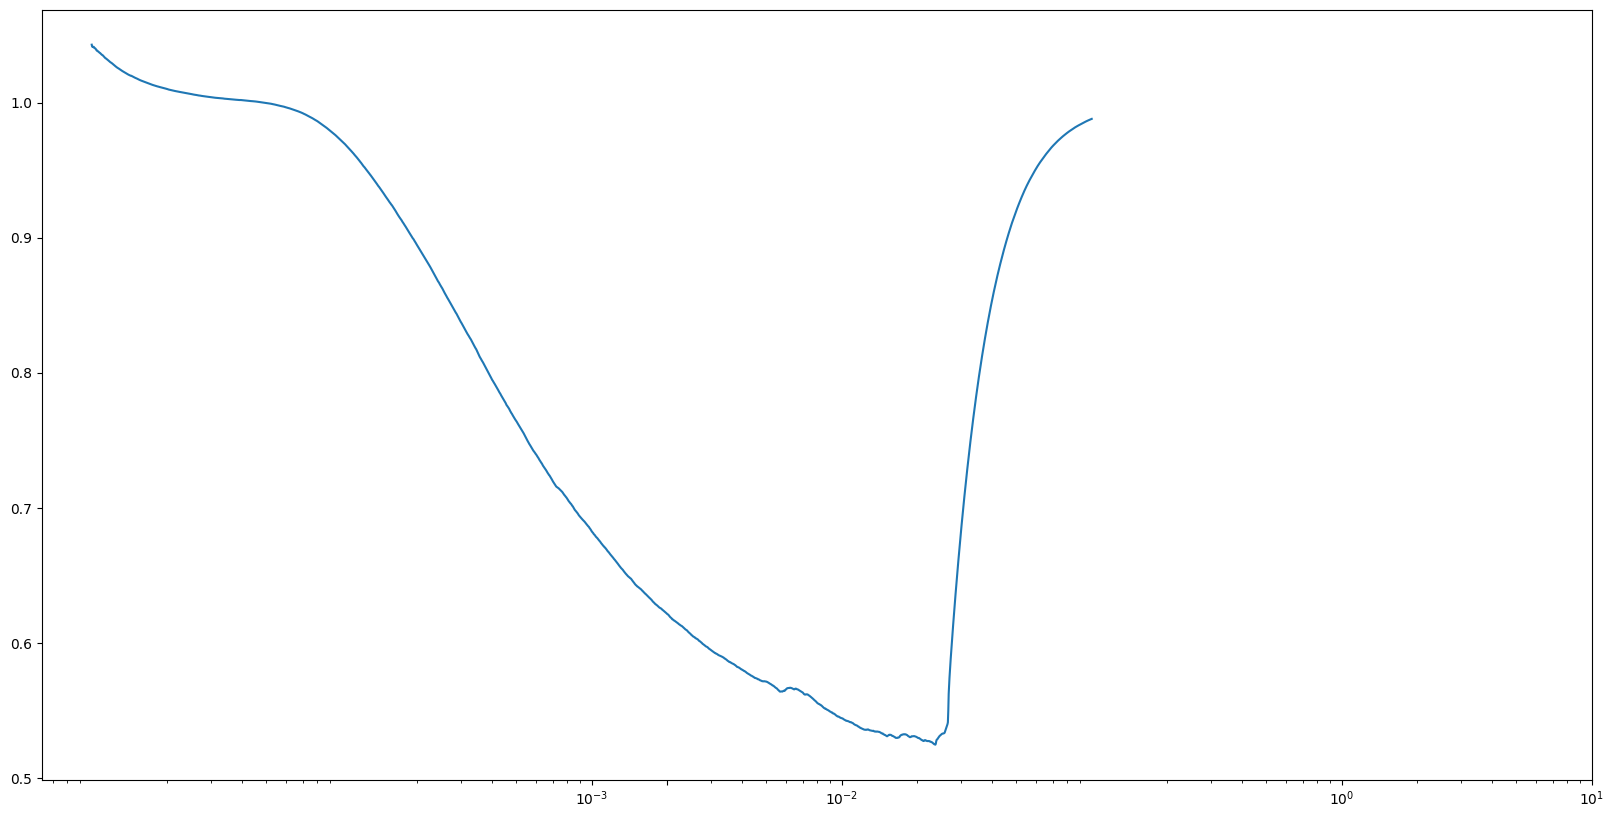

([1e-05,
  1.0037177480441551e-05,
  1.00744931773883e-05,
  1.0111947604694389e-05,
  1.014954127812434e-05,
  1.0187274715360156e-05,
  1.0225148436008457e-05,
  1.0263162961607623e-05,
  1.0301318815634984e-05,
  1.033961652351403e-05,
  1.0378056612621637e-05,
  1.0416639612295341e-05,
  1.045536605384062e-05,
  1.049423647053821e-05,
  1.0533251397651454e-05,
  1.0572411372433666e-05,
  1.0611716934135533e-05,
  1.0651168624012543e-05,
  1.0690766985332431e-05,
  1.0730512563382668e-05,
  1.0770405905477965e-05,
  1.0810447560967811e-05,
  1.0850638081244039e-05,
  1.0890978019748418e-05,
  1.0931467931980274e-05,
  1.0972108375504137e-05,
  1.1012899909957424e-05,
  1.1053843097058143e-05,
  1.1094938500612626e-05,
  1.1136186686523299e-05,
  1.1177588222796467e-05,
  1.1219143679550139e-05,
  1.1260853629021882e-05,
  1.1302718645576695e-05,
  1.1344739305714923e-05,
  1.1386916188080193e-05,
  1.1429249873467385e-05,
  1.1471740944830628e-05,
  1.1514389987291325e-05,
  1.15571

In [3]:
from model.unet import Unet
from model.training import *
from model.diffusionModel import DiffusionModel
from model.training import find_lr
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch

# training hyperparameters
batch_size = 64
learning_rate = 1e-3
# network hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
n_feat = 128 # hidden dimension feature
max_text_len = 512 # word vector
height = 64 # 64x64 image
# diffusion hyperparameters
timesteps = 500


dataset_data_path = './dataset/Flickr30k_dataset.npy'
# load dataset
dataset = CustomDataset(dataset_data_path)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=True)

df = DiffusionModel(timesteps, height)
model = Unet(in_channels=3, n_feat=n_feat, max_text_len=max_text_len, height=height, device=device).to(device)
optimizer = Adam(model.parameters(), lr=learning_rate)


find_lr(model, optimizer, dataloader, timesteps, df, start_val=1e-5, end_val=1e-1, device=device)